In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import baltic as bt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.colors as clr
from matplotlib import rc
import textwrap as textwrap
from textwrap import wrap

import numpy as np
import pandas as pd

mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false')
mpl.rcParams.update({'font.size': 22})


In [18]:
ll=bt.loadNexus("prop3_order_dta.mcc.trees",tip_regex='\|([0-9]+\-[0-9]+\-[0-9]+)') ## treeFile here can alternatively be a path to a local file
ll.treeStats() ## report stats about tree


Tree height: 2.271057
Tree length: 136.435021
strictly bifurcating tree
annotations present

Numbers of objects in tree: 1309 (654 nodes and 655 leaves)



In [21]:
def plot_tree_colored_nodes(tree, filename, traitName, color_list, metadata_translations):
    
    fig,ax = plt.subplots(figsize=(8,12),facecolor='w')

    # # this sets the vertical dashed lines on the tree; plot a dashed line every other year from 1990 to 2020
    dates_ls = []
    for i in range(2021,2023,1):
        dates_ls.append(i)  
    #dates = dates_ls[::2]
    #[ax.axvline(i,ls='--',lw=2,color='grey',zorder=0, alpha=0.6) for i in dates]

    # set date labels to be every 4
    # date_labels = []
    # for d in dates_ls[::4]:
    #     date_labels.append(str(d))
    #     if d < 2018:
    #         date_labels.append("")

    branchWidth=1 ## default branch width
    tipSize = 15

    # k objects are tips, nodes, branches
    for k in tree.Objects: ## iterate over objects in tree
        x=k.absoluteTime ## or use absolute time instead
        y=k.y 

        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x

        if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
            if traitName == "order_condensed":
                traitValue = metadata_translations[k.traits[traitName]]
            else: 
                traitValue = k.traits[traitName]
            
            traitProb = k.traits[traitName+".prob"]
            base_color=colors[traitValue]
            color_ramp = clr.LinearSegmentedColormap.from_list('custom ', ["#B9B9B9",base_color], N=256)
            c = color_ramp(traitProb)
            s=tipSize

            ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
            ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath

        elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
            number_children = len(k.leaves)
            node_branchwidth = branchWidth + number_children*0.005
            
            if traitName == "order_condensed":
                traitValue = metadata_translations[k.traits[traitName]]
            else: 
                traitValue = k.traits[traitName]

            traitProb = k.traits[traitName+".prob"]
            base_color=colors[traitValue]
            color_ramp = clr.LinearSegmentedColormap.from_list('custom ', ["#B9B9B9", base_color], N=256)
            c = color_ramp(traitProb)
            ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=node_branchwidth,color=c,ls='-',zorder=9) #color=node_colors[node_types[k]["node_community_status"]]

        ax.plot([xp,x],[y,y],lw=node_branchwidth,color=c,ls='-',zorder=9)

        # add in a legend
        han_list = []

        # bbox to anchor puts a bounding box around where you want the legend to go, prop part is for text size
    for key in color_list:
        marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key.replace("_"," ").title().replace("nonhuman_mammal","Nonhuman Mammal").replace("Nonhuman-Mammal","Nonhuman\nMammal").replace("bird","Bird").replace("Partially Migratory","Partially\nMigratory"), markersize = 10, markeredgewidth=2)
        han_list.append(marker)

    # set axis limits, remove border lines         
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)

    ax.set_ylim(-5,tree.ySpan+5)
    ax.set_xlim(2021,2023.9)
    ax.tick_params(axis='y',labelsize=0,size=0)
    ax.tick_params(axis='x',labelsize=24,size=5, width=2,color='grey')
    #ax.set_xticks(dates_ls)
    #ax.set_xticklabels(dates_ls)   # set date labels every 4
    ax.set_xticklabels(["Jan\n2021","Jul\n2021","Jan\n2022","Jul\n2022","Jan\n2023","Jul\n2023"], fontsize=20)
    ax.set_yticklabels([])

    # in order to get the legend to plot without being transparent, over the plot, it needs to be here with frame set to true
    # bbox arguments are: x, y, with 0 being furthest left and bottom
    ax.legend(handles = han_list, markerfirst = True, edgecolor="white", framealpha=1, loc='best', bbox_to_anchor=(0.75, 0.5, 0.1, 0.1),prop={'size': 20}, facecolor='w')

    fig.tight_layout()
    plt.gcf().subplots_adjust(right=0.88)
    plt.savefig(filename)

    plt.show()

In [22]:
# for plotting orders
colors = {"galliformes":"#CEB540" ,
"anseriformes":"#274257" ,
"charadriiformes":"#4E83AE" ,
"accipitriformes":"#228B22" ,
"nonhuman-mammal":"#B33226" ,
"passeriformes":"#556B2F" ,
"strigiformes":"#FF8C66"
         }



uncertainty_color:"#B9B9B9"

color_order_order = ["anseriformes","charadriiformes","galliformes","nonhuman-mammal","accipitriformes","passeriformes","strigiformes"]

metadata_translations = {"galliformes": "galliformes",
    "anseriformes": "anseriformes",
    "charadriiformes": "charadriiformes",
    "accipitriformes": "accipitriformes",
    "nonhuman-mammal": "nonhuman-mammal",
    "passeriformes":"passeriformes",
    "strigiformes":"strigiformes",
}

/var/folders/s8/16mqst794hgfqn_ky459vws40000gq/T/ipykernel_95780/4212647874.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Jan\n2021","Jul\n2021","Jan\n2022","Jul\n2022","Jan\n2023","Jul\n2023"], fontsize=20)


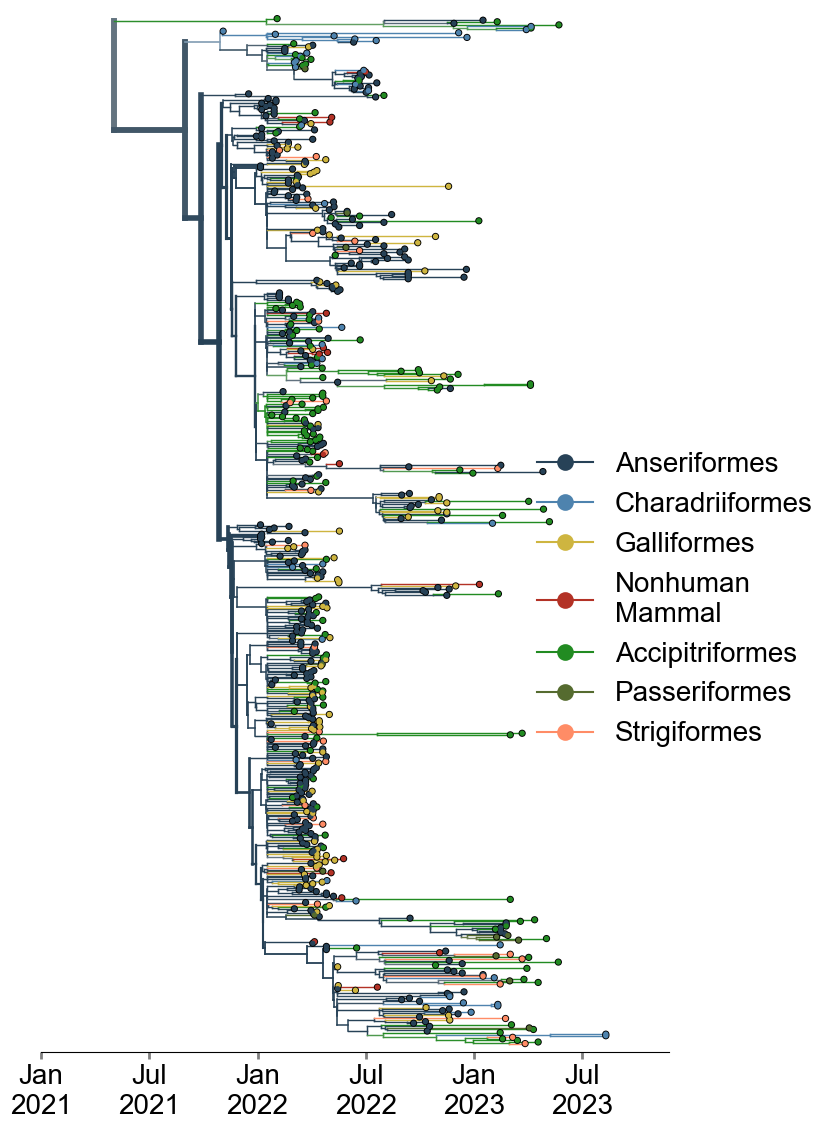

In [23]:
# set output filename
traitName = "order_condensed"
color_list = color_order_order
filename = "prop3mcc.pdf"

plot_tree_colored_nodes(ll, filename, traitName, color_list, metadata_translations)

In [7]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction
def return_height_most_recent_tip(tree):
    all_heights = []
    
    for k in tree.Objects: 
        if k.branchType == "leaf":
            height = k.traits["height"]
            all_heights.append(height)
            
    height_youngest_tip = min(all_heights)
    return(height_youngest_tip)
def return_date_most_recent_tip(tree, height_youngest_tip):
    
    for k in tree.Objects: 
        if k.branchType == "leaf":
            height = k.traits["height"]
            if height == height_youngest_tip:
                date_string = k.name.split("|")[2]
                date_format = '%Y-%m-%d'

                date_obj = dt.strptime(date_string, date_format)
                decimal_date = toYearFraction(date_obj)
                
                return(decimal_date)

In [8]:

height_youngest_tip = return_height_most_recent_tip(ll)
age_youngest_tip = return_date_most_recent_tip(ll, height_youngest_tip)
print(age_youngest_tip)

2023.608105022831


In [9]:
# get the propbabilty a given node is a given state from the DTA

most_recent_date = age_youngest_tip
def return_node_probs_by_date(tree):
    
    node_probs = {}
    
    for k in tree.Objects: 
        if k.branchType == "node":
            host = k.traits["order_condensed.states"]
            host_prob = k.traits["order_condensed.states.prob"]
            height = k.traits["height"]
            date = most_recent_date - height
            node_probs[k] = {"host":host, "host_prob":host_prob,"date":date}
            
    return(node_probs)
node_probs = return_node_probs_by_date(ll)
df = pd.DataFrame.from_dict(node_probs, orient="index")
df.head()

,host,host_prob,date
<baltic.baltic.node object at 0x11206a750>,anseriformes,0.446553,1967.946645
<baltic.baltic.node object at 0x158789550>,anseriformes,0.754246,2014.646961
<baltic.baltic.node object at 0x158789650>,anseriformes,0.346386,2017.840126
<baltic.baltic.node object at 0x158789510>,anseriformes,0.910090,2020.622092
<baltic.baltic.node object at 0x15878a8d0>,anseriformes,0.943343,2022.490341


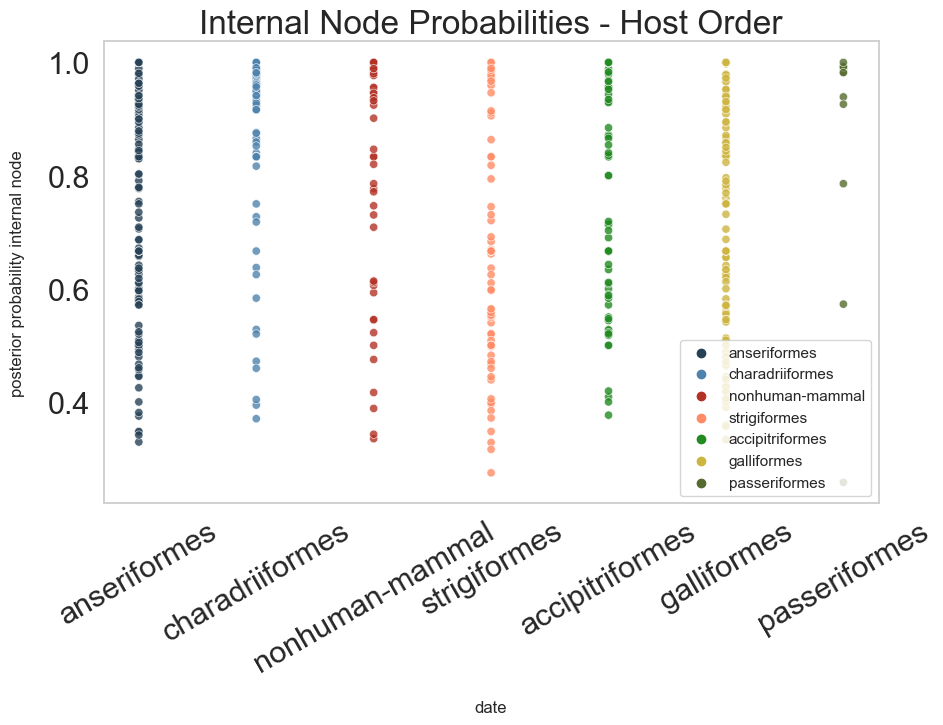

In [10]:
import seaborn as sns 
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='host', y='host_prob', hue='host', palette={"galliformes":"#CEB540" ,
"anseriformes":"#274257" ,
"charadriiformes":"#4E83AE" ,
"accipitriformes":"#228B22" ,
"nonhuman-mammal":"#B33226" ,
"passeriformes":"#556B2F" ,
"strigiformes":"#FF8C66"}, alpha=0.8)

# Set axis labels
scatter_plot.set(xlabel='\ndate', ylabel='posterior probability internal node\n')

# Set legend title to blank
scatter_plot.legend().set_title("")


scatter_plot.set_title("Internal Node Probabilities - Host Order", fontsize=24)
scatter_plot.tick_params(axis='y', labelsize=22)
scatter_plot.tick_params(axis='x', labelsize=22, rotation=30)
scatter_plot.grid(False)
plt.legend(loc='lower right')
plt.savefig('internalnodeprobshostorder1.pdf')
# Show the plot
plt.show()

In [11]:
df_high_prob = df[df['host_prob'] >= 0.9]
print(len(df_high_prob))
df_high_prob.head()
df_high_prob.to_csv("df_high_prob-order.csv")

310


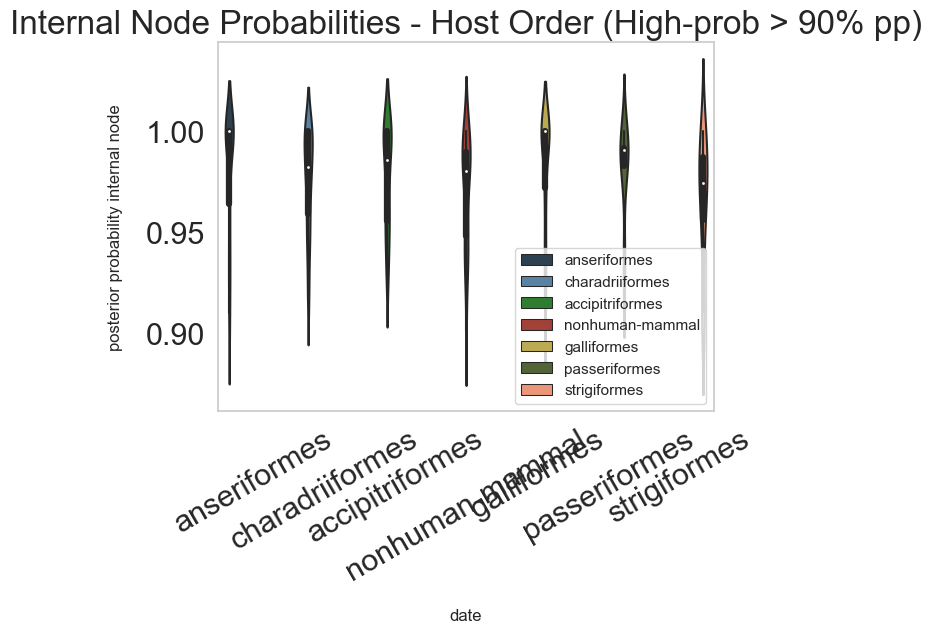

In [12]:
scatter_plot = sns.violinplot(data=df_high_prob, x='host', y='host_prob', hue='host', palette={"galliformes":"#CEB540" ,
"anseriformes":"#274257" ,
"charadriiformes":"#4E83AE" ,
"accipitriformes":"#228B22" ,
"nonhuman-mammal":"#B33226" ,
"passeriformes":"#556B2F" ,
"strigiformes":"#FF8C66"}, alpha=0.8)

# Set axis labels
scatter_plot.set(xlabel='\ndate', ylabel='posterior probability internal node\n')

# Set legend title to blank
scatter_plot.legend().set_title("")


scatter_plot.set_title("Internal Node Probabilities - Host Order (High-prob > 90% pp)", fontsize=24)
scatter_plot.tick_params(axis='y', labelsize=22)
scatter_plot.tick_params(axis='x', labelsize=22, rotation=30)
scatter_plot.grid(False)
plt.legend(loc='lower right')
plt.savefig('internalnodeprobshostorder4.pdf')
# Show the plot
plt.show()

2021.23090148087 Root
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from charadriiformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from charadriiformes>passeriformes switch, traversing within passeriformes
subtree resulting from anseriformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from charadriiformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from anseriformes>nonhuman-ma

subtree resulting from galliformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>strigiformes switch, traversing within strigiformes
subtree resulting

subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from nonhuman-mammal>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from galliformes>strigiformes switch, traversing within strigiformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting fr

subtree resulting from anseriformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from galliformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from charadriiformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>strigiformes switch, traversing within strigiformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>accipitriformes switch, traversing within accipitriformes
subtree result

subtree resulting from charadriiformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from charadriiformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from charadriiformes>passeriformes switch, traversing within passeriformes
subtree resulting from charadriiformes>passeriformes switch, traversing within passeriformes
subtree resulting from charadriiformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from nonhuman-mammal>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from accipitriformes>strigiformes switch, traversing within strigiformes
subtree resulting from accipitriformes>passeriformes switch, traversing within passeriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from nonhuman-mammal>charadriiformes switc

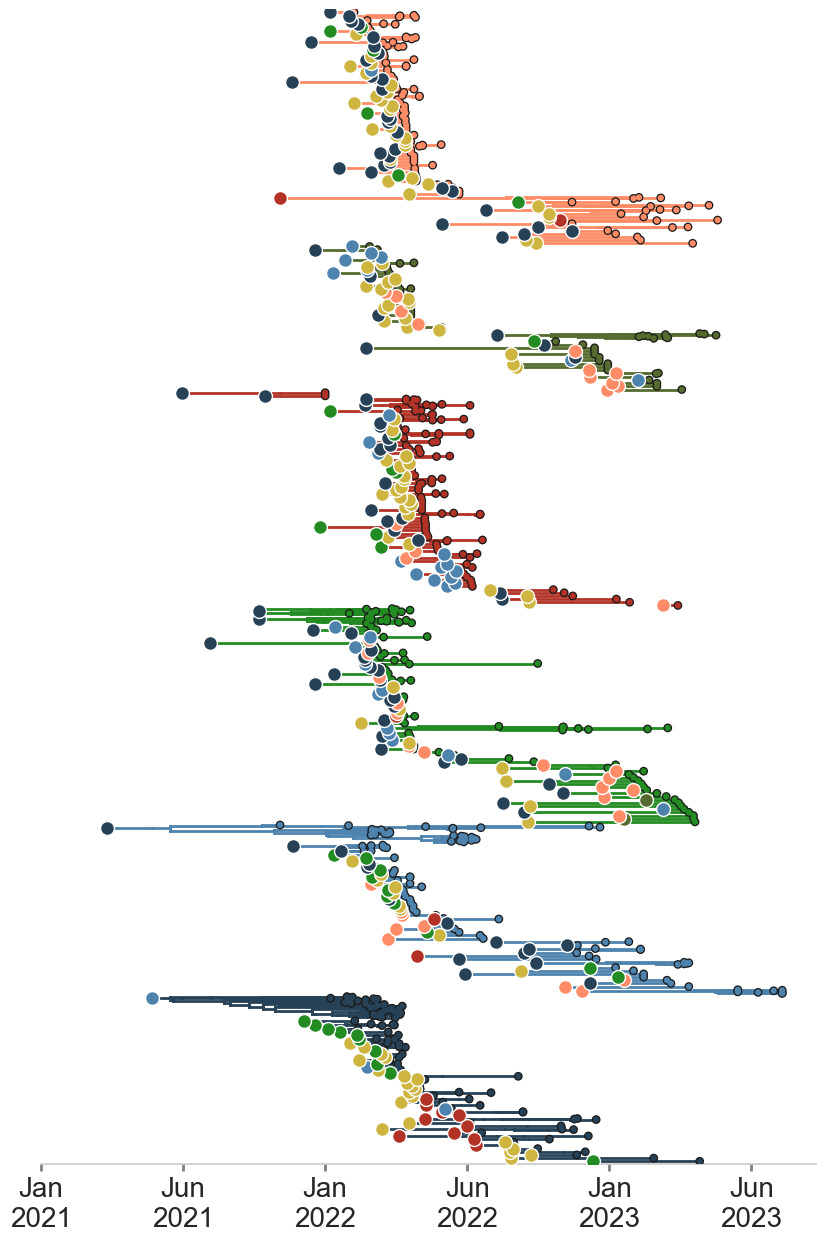

In [36]:
from matplotlib import gridspec
# used code from gytis webpage https://phylo-baltic.github.io/baltic-gallery/basic-exploded-tree-flu/

traitName='order_condensed.states' ## trait which will be used to disassemble the tree
branchWidth=2

print(ll.root.absoluteTime,ll.root.parent.index)
tree_strings={'galliformes':[],'anseriformes':[],'charadriiformes':[],'accipitriformes':[],'nonhuman-mammal':[],'passeriformes':[],'strigiformes':[]}
subtype_trees={'galliformes':[],'anseriformes':[],'charadriiformes':[],'accipitriformes':[],'nonhuman-mammal':[],'passeriformes':[],'strigiformes':[]}



for l in ll.Objects: ## iterate over branches
    k=l ## branch
    kp=l.parent ## branch's parent
    
    ## get current node's and its parent's trait states
    kloc=k.traits[traitName] ## get branch trait value
    if traitName in k.parent.traits: ## if parent has trait
        kploc=kp.traits[traitName] ## get parental trait value
        kpc=kploc
    else: ## parent does not have trait value, must be at root
        kploc='anseriformes'
        kpc='anseriformes'

    kc=kloc ## kc is branch trait value, kpc is branch parent trait value
    
    ## if states do not match
    if kc!=kpc:
        traverse_condition=lambda w:w.traits[traitName]==kc ## only traverse tree for as long as branches are in the branch state
        print('subtree resulting from %s>%s switch, traversing within %s'%(kpc,kc,kc))
        subtree=ll.subtree(k,traverse_condition=traverse_condition) ## this function returns a new baltic object that contains a trait-traversed subtree, starting from node k, for as long as the traversal stays within the starting trait value state
        
        if subtree: ## if the conditional subtree traversal failed because no tips were encountered None is returned
            subtree.traverse_tree() ## traverse subtree
            subtree.sortBranches() ## sort branches
            tree_strings[kc].append(subtree.toString()) ## remember subtree string, subtree object itself
            subtype_trees[kc].append((kpc,subtree)) ## add parental state and subtree to list

fig = plt.figure(figsize=(10, 15),facecolor='w') ## create figure
gs = gridspec.GridSpec(1,1,wspace=0.0) ## using gridspec by default
ax=plt.subplot(gs[0],facecolor='w') ## create axes

tipSize=20
cumulative_y=0

colors = {"galliformes":"#CEB540" ,
"anseriformes":"#274257" ,
"charadriiformes":"#4E83AE" ,
"accipitriformes":"#228B22" ,
"nonhuman-mammal":"#B33226" ,
"passeriformes":"#556B2F" ,
"strigiformes":"#FF8C66"
         }

x_attr=lambda k: k.absoluteTime
c_func=lambda k: '#CEB540' if k.traits[traitName]=='galliformes' else ('#274257' if k.traits[traitName] == 'anseriformes' else '#4E83AE' if k.traits[traitName] == 'charadriiformes' else '#228B22' if k.traits[traitName] == 'accipitriformes' else '#B33226' if k.traits[traitName] == 'nonhuman-mammal' else '#556B2F' if k.traits[traitName] == 'passeriformes' else '#FF8C66' if k.traits[traitName] == 'strigiformes' else '#D1BA56')

for subtype in ['anseriformes','charadriiformes','accipitriformes','nonhuman-mammal','passeriformes','strigiformes']: ## iterate over trait values
    for t,tr in enumerate(sorted(subtype_trees[subtype],key=lambda x:(-x[1].root.absoluteTime,len(x[1].Objects)))): ## iterate over extracted subtrees sorted according to their root height and their size
        origin,loc_tree=tr ## get origin of subtree, subtree itself
        
        y_attr=lambda k: k.y+cumulative_y ## subtree y values will be offset
        
        loc_tree.plotTree(ax,x_attr=x_attr,y_attr=y_attr,colour=c_func) ## plot subtree
        loc_tree.plotPoints(ax,x_attr=x_attr,y_attr=y_attr,size=tipSize,colour=c_func,zorder=100) ## plot tip points
        
        oriC='#274257' if origin=='anseriformes' else c_func(loc_tree.root.parent) ## origin of subtree
        
        oriX=loc_tree.root.absoluteTime-loc_tree.root.length
        oriY=loc_tree.root.y+cumulative_y
        
        ax.scatter(oriX,oriY,100,facecolor=oriC,edgecolor='w',lw=1,zorder=200) ## add big circle at base of tree to indicate origin
        cumulative_y+=loc_tree.ySpan+5 ## increment y displacement
        
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

[ax.spines[loc].set_visible(False) for loc in ['top','right','left']]

ax.tick_params(axis='x',labelsize=24,size=5, width=2,color='grey')
## no x axis ticks or labels
ax.tick_params(axis='y',size=0)

#ax.grid(axis='x',ls='--')

ax.set_yticklabels([])
ax.set_ylim(-5,cumulative_y)
ax.set_xticks((2021.0,2021.5,2022.0,2022.5,2023.0,2023.5))
ax.set_xticklabels(["Jan\n2021","Jun\n2021","Jan\n2022","Jun\n2022","Jan\n2023","Jun\n2023"], fontsize=20)

ax.grid(False)

plt.savefig('explodedtree-order.pdf')
plt.show()

2021.23090148087 Root
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from charadriiformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from charadriiformes>passeriformes switch, traversing within passeriformes
subtree resulting from anseriformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from charadriiformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from anseriformes>nonhuman-ma

subtree resulting from galliformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>strigiformes switch, traversing within strigiformes
subtree resulting

subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from anseriformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from nonhuman-mammal>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from galliformes>strigiformes switch, traversing within strigiformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resu

subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from anseriformes>strigiformes switch, traversing within strigiformes
subtree resulting from galliformes>charadriiformes switch, traversing within charadriiformes
subtree resulting from charadriiformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting from galliformes>strigiformes switch, traversing within strigiformes
subtree resulting from galliformes>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>galliformes switch, traversing within galliformes
subtree resulting fr

subtree resulting from charadriiformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from charadriiformes>passeriformes switch, traversing within passeriformes
subtree resulting from charadriiformes>passeriformes switch, traversing within passeriformes
subtree resulting from charadriiformes>nonhuman-mammal switch, traversing within nonhuman-mammal
subtree resulting from nonhuman-mammal>anseriformes switch, traversing within anseriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from accipitriformes>strigiformes switch, traversing within strigiformes
subtree resulting from accipitriformes>passeriformes switch, traversing within passeriformes
subtree resulting from anseriformes>accipitriformes switch, traversing within accipitriformes
subtree resulting from nonhuman-mammal>charadriiformes switch, traversing within charadriiformes
subtree resulting from charadriiformes>nonhuman-mammal switc

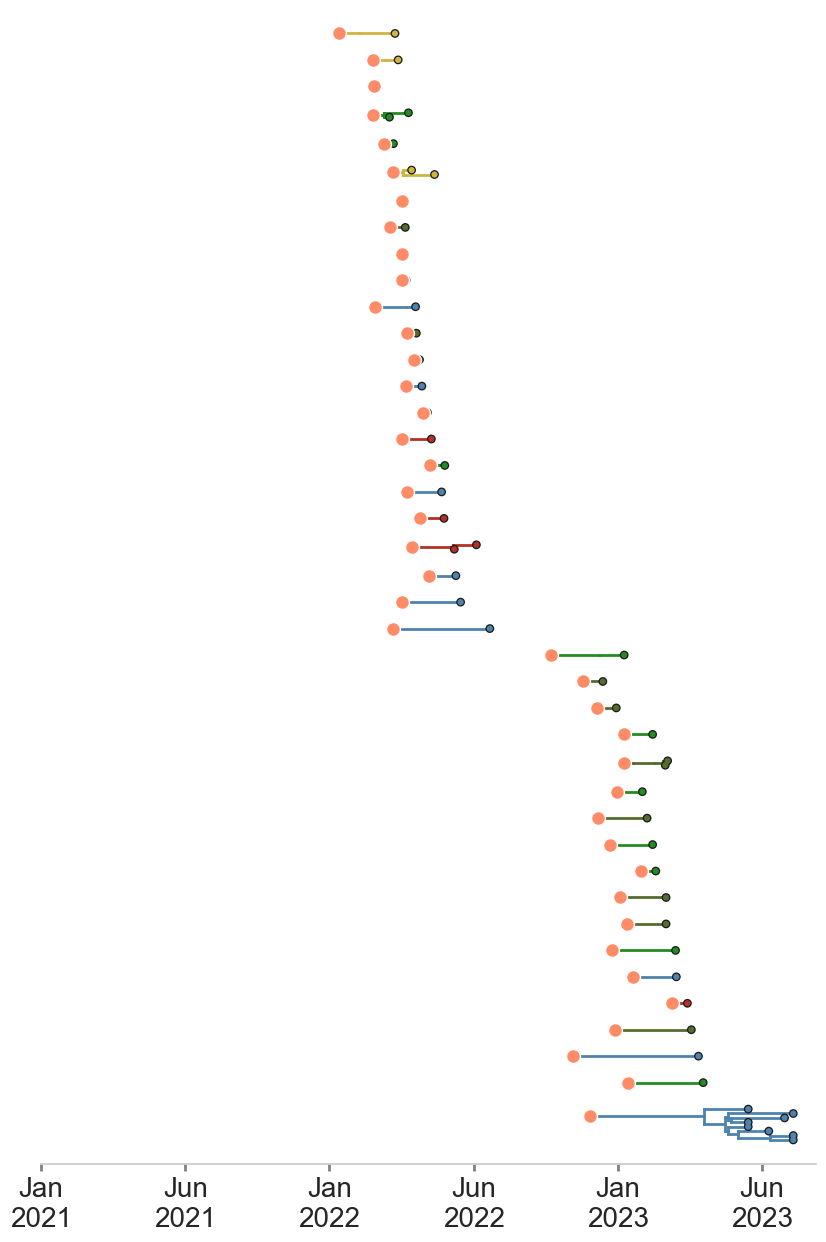

In [43]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

traitName = 'order_condensed.states' ## trait which will be used to disassemble the tree
branchWidth = 2

print(ll.root.absoluteTime, ll.root.parent.index)
tree_strings = {'galliformes': [], 'anseriformes': [], 'charadriiformes': [], 'accipitriformes': [], 'nonhuman-mammal': [], 'passeriformes': [], 'strigiformes': []}
subtype_trees = {'galliformes': [], 'anseriformes': [], 'charadriiformes': [], 'accipitriformes': [], 'nonhuman-mammal': [], 'passeriformes': [], 'strigiformes': []}

for l in ll.Objects: ## iterate over branches
    k = l ## branch
    kp = l.parent ## branch's parent

    ## get current node's and its parent's trait states
    kloc = k.traits[traitName] ## get branch trait value
    if traitName in k.parent.traits: ## if parent has trait
        kploc = kp.traits[traitName] ## get parental trait value
        kpc = kploc
    else: ## parent does not have trait value, must be at root
        kploc = 'anseriformes'
        kpc = 'anseriformes'

    kc = kloc ## kc is branch trait value, kpc is branch parent trait value

    ## if states do not match
    if kc != kpc:
        traverse_condition = lambda w: w.traits[traitName] == kc ## only traverse tree for as long as branches are in the branch state
        print('subtree resulting from %s>%s switch, traversing within %s' % (kpc, kc, kc))
        subtree = ll.subtree(k, traverse_condition=traverse_condition) ## this function returns a new baltic object that contains a trait-traversed subtree, starting from node k, for as long as the traversal stays within the starting trait value state
        
        if subtree: ## if the conditional subtree traversal failed because no tips were encountered None is returned
            subtree.traverse_tree() ## traverse subtree
            subtree.sortBranches() ## sort branches
            tree_strings[kc].append(subtree.toString()) ## remember subtree string, subtree object itself
            subtype_trees[kc].append((kpc, subtree)) ## add parental state and subtree to list

# Filter only those subtrees where the origin is 'anseriformes'
filtered_subtype_trees = [(origin, tree) for subtype, trees in subtype_trees.items() for origin, tree in trees if origin == 'strigiformes']

# Sort filtered subtrees by absoluteTime (x values) and y values in descending order
filtered_subtype_trees.sort(key=lambda x: (x[1].root.absoluteTime, x[1].root.y), reverse=True)

# Plot only filtered subtrees
fig = plt.figure(figsize=(10, 15), facecolor='w') ## create figure
gs = gridspec.GridSpec(1, 1, wspace=0.0) ## using gridspec by default
ax = plt.subplot(gs[0], facecolor='w') ## create axes

tipSize = 20
cumulative_y = 0

colors = {
    "galliformes": "#CEB540",
    "anseriformes": "#274257",
    "charadriiformes": "#4E83AE",
    "accipitriformes": "#228B22",
    "nonhuman-mammal": "#B33226",
    "passeriformes": "#556B2F",
    "strigiformes": "#FF8C66"
}

x_attr = lambda k: k.absoluteTime
c_func = lambda k: '#CEB540' if k.traits[traitName] == 'galliformes' else ('#274257' if k.traits[traitName] == 'anseriformes' else '#4E83AE' if k.traits[traitName] == 'charadriiformes' else '#228B22' if k.traits[traitName] == 'accipitriformes' else '#B33226' if k.traits[traitName] == 'nonhuman-mammal' else '#556B2F' if k.traits[traitName] == 'passeriformes' else '#FF8C66' if k.traits[traitName] == 'strigiformes' else '#D1BA56')

for origin, loc_tree in filtered_subtype_trees:
    y_attr = lambda k: k.y + cumulative_y  ## subtree y values will be offset
    
    loc_tree.plotTree(ax, x_attr=x_attr, y_attr=y_attr, colour=c_func) ## plot subtree
    loc_tree.plotPoints(ax, x_attr=x_attr, y_attr=y_attr, size=tipSize, colour=c_func, zorder=100) ## plot tip points
    
    oriC = '#274257' if origin == 'anseriformes' else c_func(loc_tree.root.parent)
    
    oriX = loc_tree.root.absoluteTime - loc_tree.root.length
    oriY = loc_tree.root.y + cumulative_y
    
    ax.scatter(oriX, oriY, 100, facecolor=oriC, edgecolor='w', lw=1, zorder=200) ## add big circle at base of tree to indicate origin
    cumulative_y += loc_tree.ySpan + 5 ## increment y displacement

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

[ax.spines[loc].set_visible(False) for loc in ['top', 'right', 'left']]

ax.tick_params(axis='x', labelsize=24, size=5, width=2, color='grey')
## no x axis ticks or labels
ax.tick_params(axis='y', size=0)

ax.set_yticklabels([])
ax.set_ylim(-5, cumulative_y)
ax.set_xticks((2021.0,2021.5,2022.0,2022.5,2023.0,2023.5))
ax.set_xticklabels(["Jan\n2021","Jun\n2021","Jan\n2022","Jun\n2022","Jan\n2023","Jun\n2023"], fontsize=20)
ax.grid(False)

plt.savefig('explodedtree-orderstrigiformes.pdf')
plt.show()